TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [1]:
import ROOT
# %jsroot on
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
import random
from utils import ResultSet
from utils import clear, show_event, show_value, show_function, normalize_columns, CANVAS, PDG

Welcome to JupyROOT 6.08/06


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [2]:
rs_TTZ  = ResultSet("TTZ",  "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
rs_TTW  = ResultSet("TTW",  "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
rs_TTH1 = ResultSet("TTH1", "../data/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree.root")
# rs_TTH2 = ResultSet("TTH2", "../data/TTHnobb_mWCutfix_ch0_treeProducerSusyMultilepton_tree.root")
rs_TTTT = ResultSet("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Running analysis for sample:  TTZ
Writing log data to ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTW
Writing log data to ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTH1
Writing log data to ../data/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTTT
Writing log data to ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.log


In [22]:
# print(rs_TTZ.SR4j_count[0])
# print(rs_TTW.SR4j_count[0])
# print(rs_TTH1.SR4j_count[0])
# print(rs_TTTT.SR4j_count[0])
# print('-'*80)
# print(rs_TTZ.SR5j_count[0])
# print(rs_TTW.SR5j_count[0])
# print(rs_TTH1.SR5j_count[0])
# print(rs_TTTT.SR5j_count[0])
# print('-'*80)
# print(rs_TTZ.SR6j_count[0])
# print(rs_TTW.SR6j_count[0])
# print(rs_TTH1.SR6j_count[0])
# print(rs_TTTT.SR6j_count[0])
x = 12
s = 1.0
display_markdown(f"""
| L=N/A |           SR4j            |            SR5j           |            SR6J           |
| ----- | -------------------------:| -------------------------:| -------------------------:|
| tttt  | {s*rs_TTTT.SR4j_count[0]} | {s*rs_TTTT.SR5j_count[0]} | {s*rs_TTTT.SR6j_count[0]} |
| ttZ   | {s*rs_TTZ.SR4j_count[0]}  | {s*rs_TTZ.SR5j_count[0]}  | {s*rs_TTZ.SR6j_count[0]}  |
| ttW   | {s*rs_TTW.SR4j_count[0]}  | {s*rs_TTW.SR5j_count[0]}  | {s*rs_TTW.SR6j_count[0]}  |
| ttH   | {s*rs_TTH1.SR4j_count[0]} | {s*rs_TTH1.SR5j_count[0]} | {s*rs_TTH1.SR6j_count[0]} |

""", raw=True)
s = 8.6/818
display_markdown(f"""
| L=N/A |           SR4j            |            SR5j           |            SR6J           |
| ----- | -------------------------:| -------------------------:| -------------------------:|
| tttt  | {s*rs_TTTT.SR4j_count[0]} | {s*rs_TTTT.SR5j_count[0]} | {s*rs_TTTT.SR6j_count[0]} |
| ttZ   | {s*rs_TTZ.SR4j_count[0]}  | {s*rs_TTZ.SR5j_count[0]}  | {s*rs_TTZ.SR6j_count[0]}  |
| ttW   | {s*rs_TTW.SR4j_count[0]}  | {s*rs_TTW.SR5j_count[0]}  | {s*rs_TTW.SR6j_count[0]}  |
| ttH   | {s*rs_TTH1.SR4j_count[0]} | {s*rs_TTH1.SR5j_count[0]} | {s*rs_TTH1.SR6j_count[0]} |

""", raw=True)


| L=N/A |           SR4j            |            SR5j           |            SR6J           |
| ----- | -------------------------:| -------------------------:| -------------------------:|
| tttt  | 818.0 | 779.0 | 687.0 |
| ttZ   | 410.0  | 296.0  | 183.0  |
| ttW   | 183.0  | 123.0  | 62.0  |
| ttH   | 683.0 | 526.0 | 323.0 |




| L=N/A |           SR4j            |            SR5j           |            SR6J           |
| ----- | -------------------------:| -------------------------:| -------------------------:|
| tttt  | 8.6 | 8.18997555012225 | 7.222738386308069 |
| ttZ   | 4.310513447432763  | 3.1119804400977995  | 1.923960880195599  |
| ttW   | 1.923960880195599  | 1.2931540342298289  | 0.6518337408312959  |
| ttH   | 7.180684596577017 | 5.530073349633252 | 3.395843520782396 |



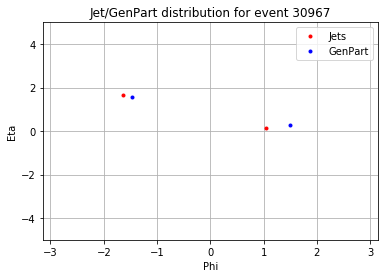

In [4]:
def plot_Jet_eta_phi(dataset, event_number = None):
    import matplotlib.pyplot as plt
    %matplotlib inline
    if event_number is None:
        event_number = random.randint(0,len(dataset.Jet_pt)-1)
    phis = list(dataset.Jet_phi[event_number])
    etas = list(dataset.Jet_eta[event_number])
    mc_phis = list(dataset.GenPart_phi[event_number])
    mc_etas = list(dataset.GenPart_eta[event_number])
    mc_ids = list(dataset.GenPart_pdgId[event_number])
    
    mc_phis,mc_etas = zip(*[(phi, eta) for phi, eta, pdgid in zip(mc_phis,mc_etas,mc_ids) if abs(pdgid) in {1,2,3,4,5,21}]) 
    
    plt.plot(phis,etas, 'r.', label='Jets')
    plt.plot(mc_phis,mc_etas, 'b.', label='GenPart')
    plt.xlim(-3.14159, 3.14159)
    plt.ylim(-5,5)
    plt.xlabel('Phi')
    plt.ylabel('Eta')
    plt.title("Jet/GenPart distribution for event {}".format(event_number))
    plt.grid()
    plt.legend()
    plt.show()
    
plot_Jet_eta_phi(rs_TTZ)

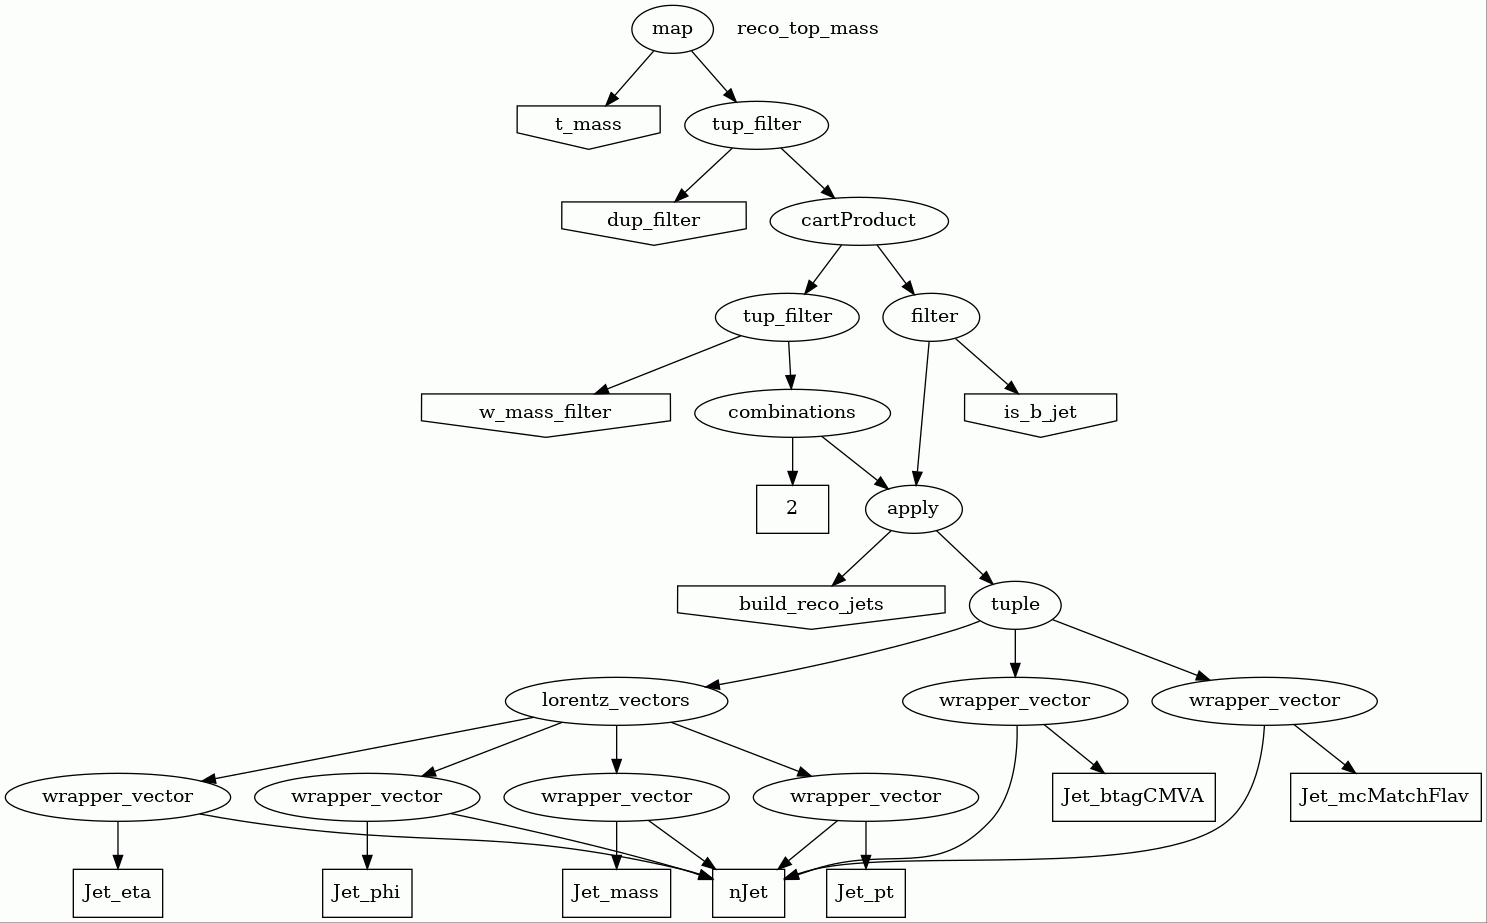

*t_mass*
-----
```cpp
([](const std::tuple<Particle, Particle> &w, const Particle &b) {
  return (std::get<0>(w).v + std::get<1>(w).v + b.v).M();
})

```

---
*dup_filter*
-----
```cpp
([](const std::tuple<Particle, Particle> &w, const Particle &b) {
  int j0 = b.idx;
  int j1 = std::get<0>(w).idx;
  int j2 = std::get<1>(w).idx;
  return (j0 != j1) && (j0 != j2) && (j1 != j2);
})

```

---
*w_mass_filter*
-----
```cpp
([ win_l = W_MASS - 10, win_h = W_MASS + 10 ](const Particle &j1,
                                              const Particle &j2) {
  float inv_mass = (j1.v + j2.v).M();
  return inv_mass > win_l && inv_mass < win_h;
})

```

---
*build_reco_jets*
-----
```cpp
([](const std::vector<TLorentzVector> &vs, const std::vector<float> &b_cmvas,
    const std::vector<int> &mcMatchFlavs) {
  std::vector<Particle> jets;
  for (int i = 0; i < vs.size(); i++) {
    Particle p = Particle::Jet(i, vs[i], {b_cmvas[i], mcMatchFlavs[i]});
    jets.push_back(p);
  }
  return jets;
})

```

---
*is_b_jet*
-----
```cpp
([](const Particle &p) {
  if (p.tag != Particle::JET)
    return false;
  return p.jet.b_cmva > 0;
})

```

---
*build_reco_jets*
-----
```cpp
([](const std::vector<TLorentzVector> &vs, const std::vector<float> &b_cmvas,
    const std::vector<int> &mcMatchFlavs) {
  std::vector<Particle> jets;
  for (int i = 0; i < vs.size(); i++) {
    Particle p = Particle::Jet(i, vs[i], {b_cmvas[i], mcMatchFlavs[i]});
    jets.push_back(p);
  }
  return jets;
})

```

---

In [5]:
img, fns = show_value(rs_TTTT, 'reco_top_mass')
display(img)
display(fns)
# display(show_value(hists_TTTT.mc_top_mass))

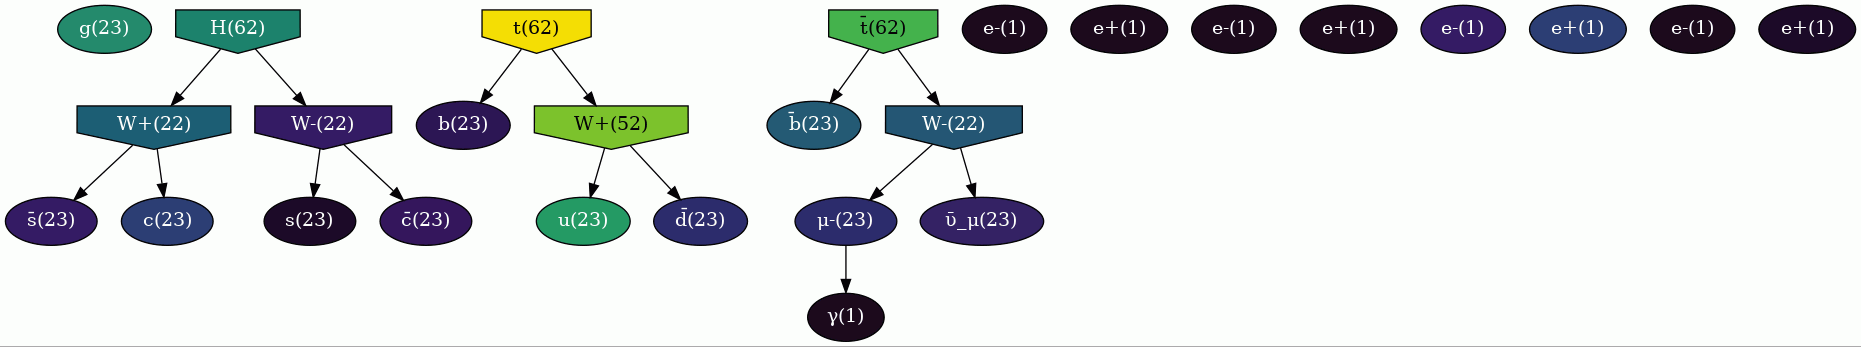

c   |b   |c   |s   |0   


In [6]:
n = 0
def to_str(vec):
    return '|'.join(map(lambda s: "{!s:<4s}".format(PDG.get(s,s)),vec))
# print(to_str(rs_TTTT.Jet_mcFlavour[n]))
print(to_str(rs_TTH1.Jet_mcMatchFlav[n]))
# print(to_str(rs_TTTT.Jet_mcMatchId[n]))
n+=1
show_event(rs_TTH1, n)

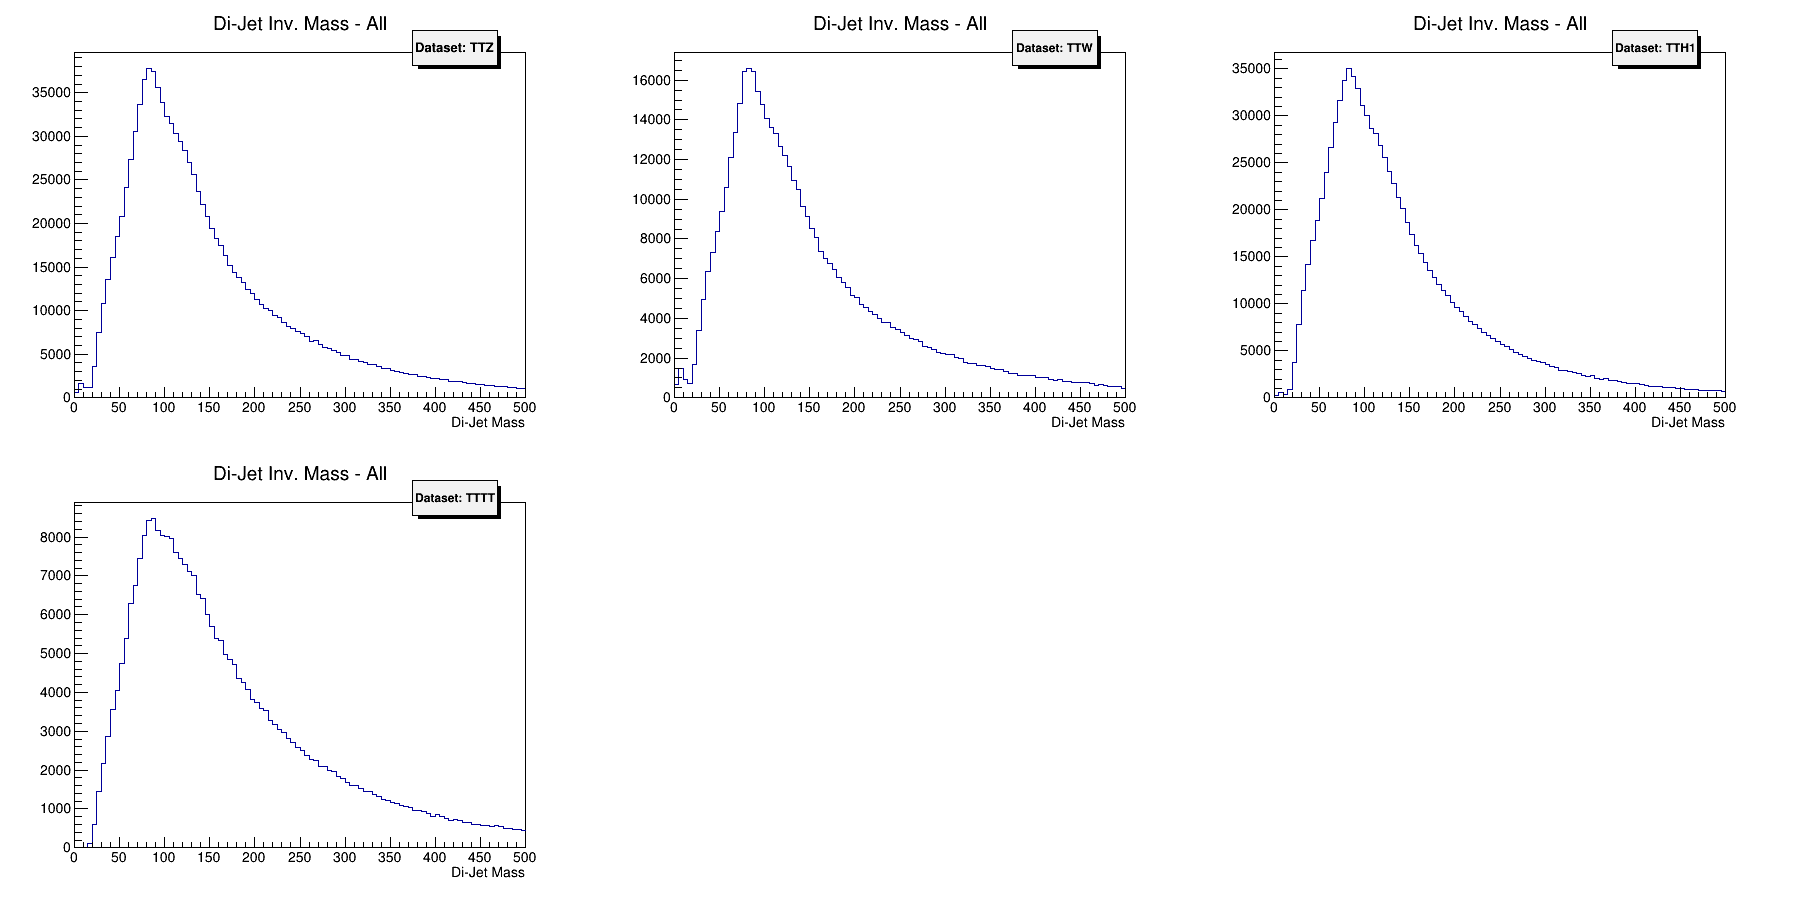

In [7]:
clear()
ResultSet.hist_array_single('dijet_inv_mass')
CANVAS.Draw()

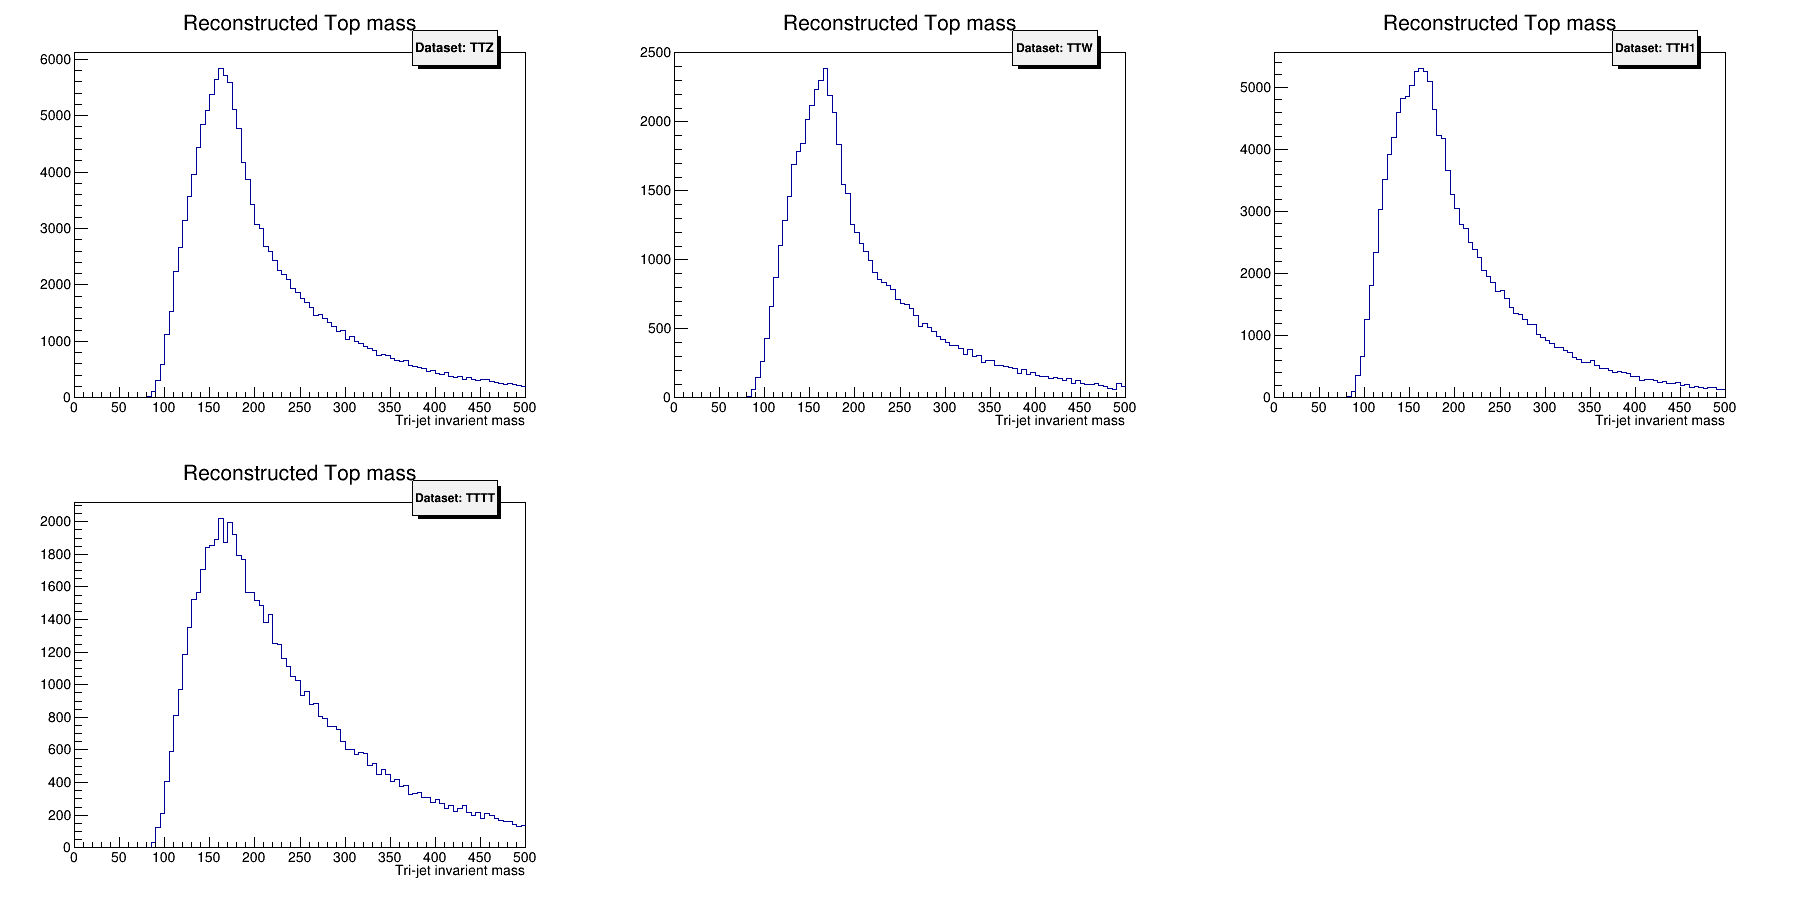

In [8]:
clear()
ResultSet.hist_array_single('reco_top_mass')
CANVAS.Draw()

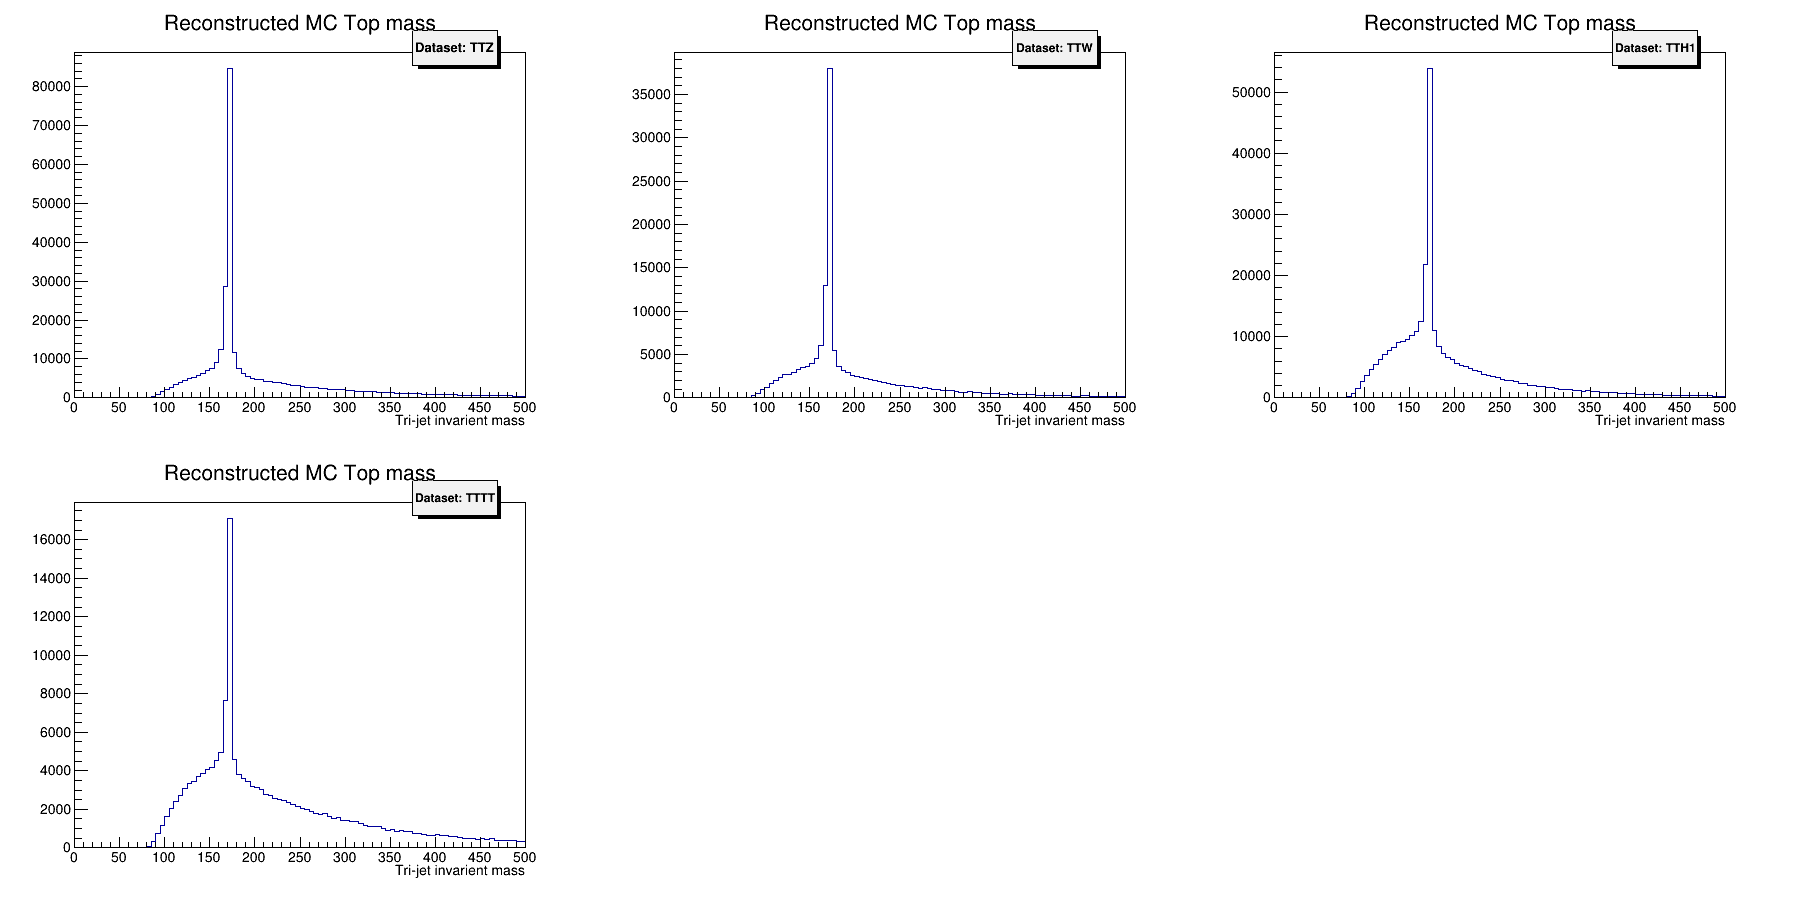

In [9]:
clear()
ResultSet.hist_array_single('mc_top_mass')
CANVAS.Draw()

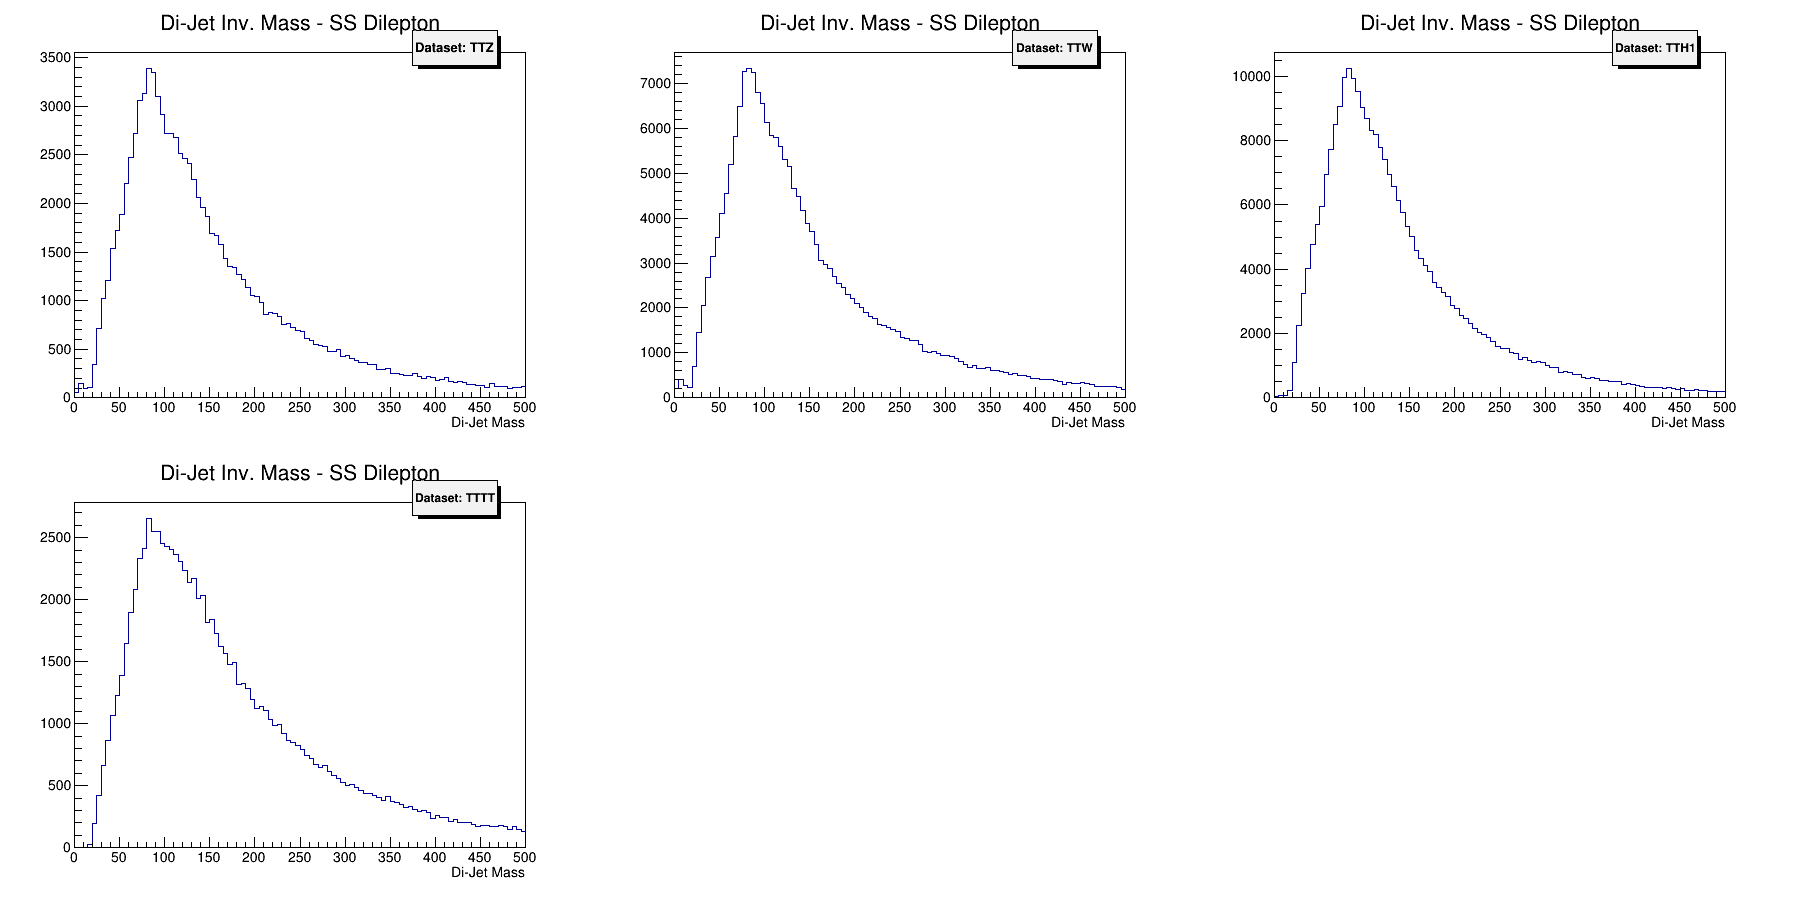

In [10]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_ssdilepton')
CANVAS.Draw()

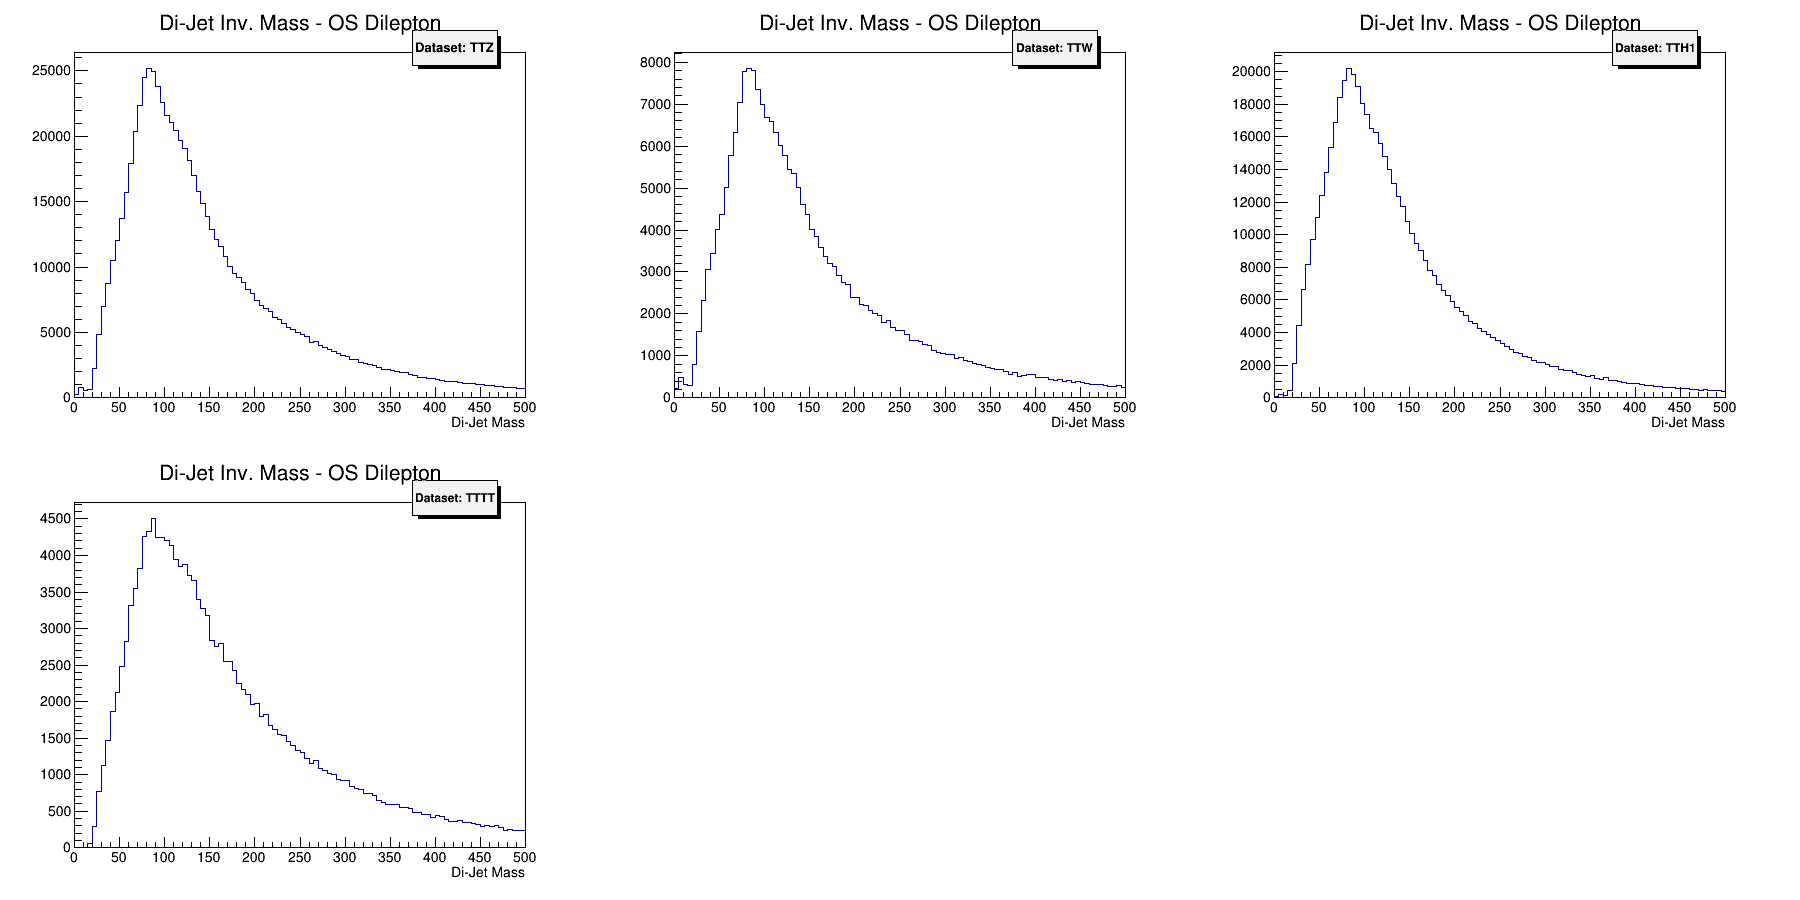

In [11]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_osdilepton')
CANVAS.Draw()

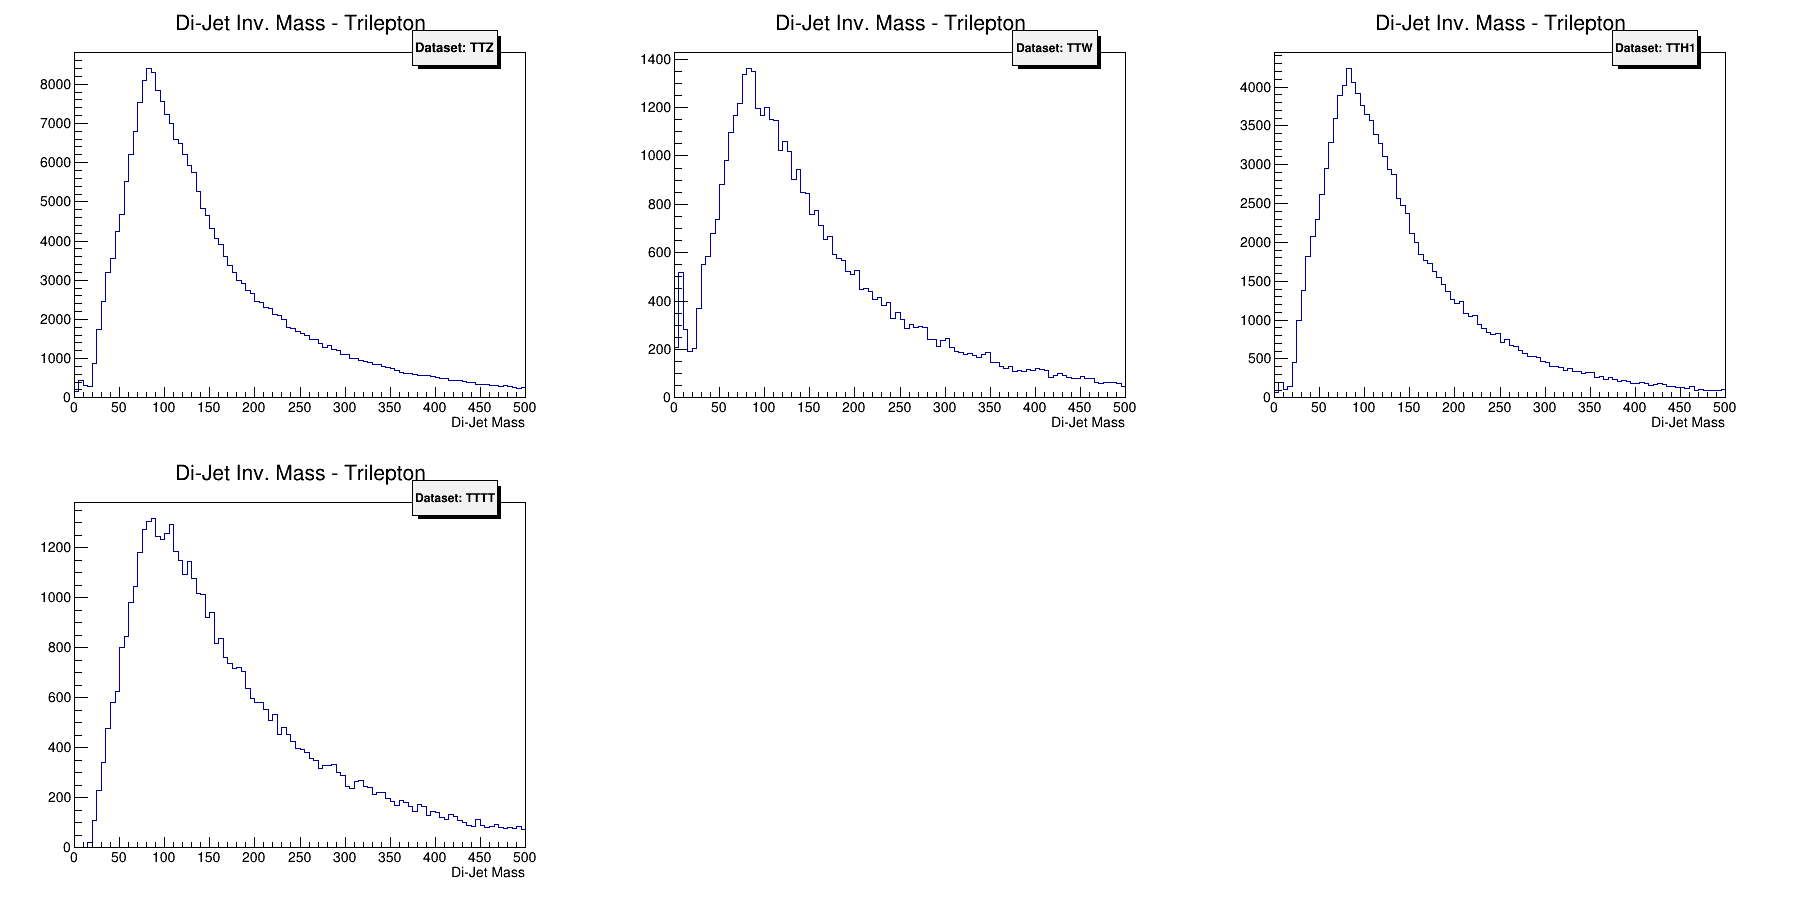

In [12]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_trilepton')
CANVAS.Draw()

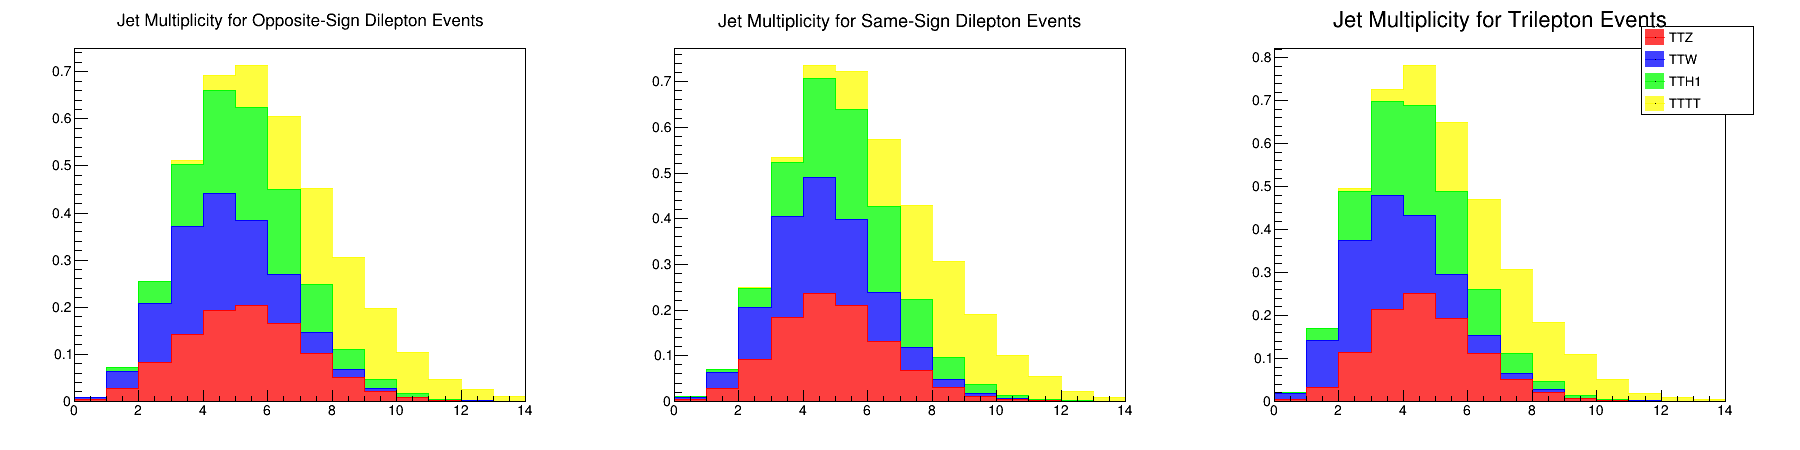

In [13]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=1,
                           enable_fill=True,
                           shape=(3,1),
                          )
CANVAS.Draw()

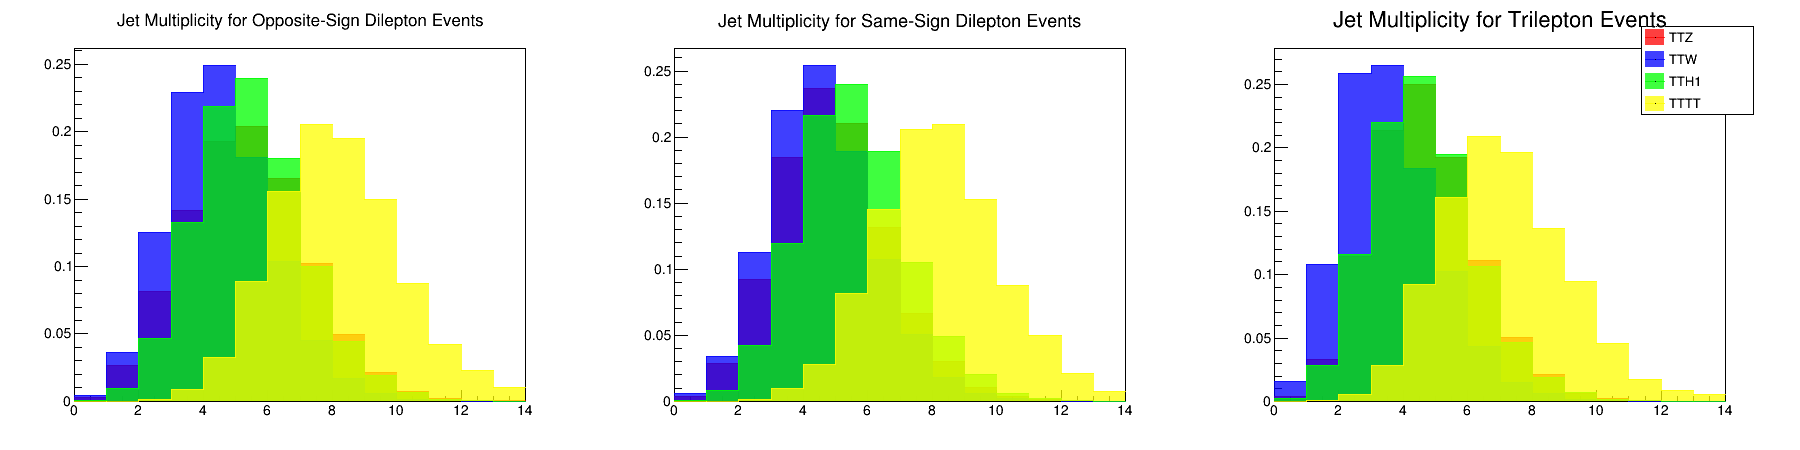

In [14]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=1,
                           enable_fill=True,
                           shape=(3,1),
                           draw_option='nostack',
                          )
CANVAS.Draw()

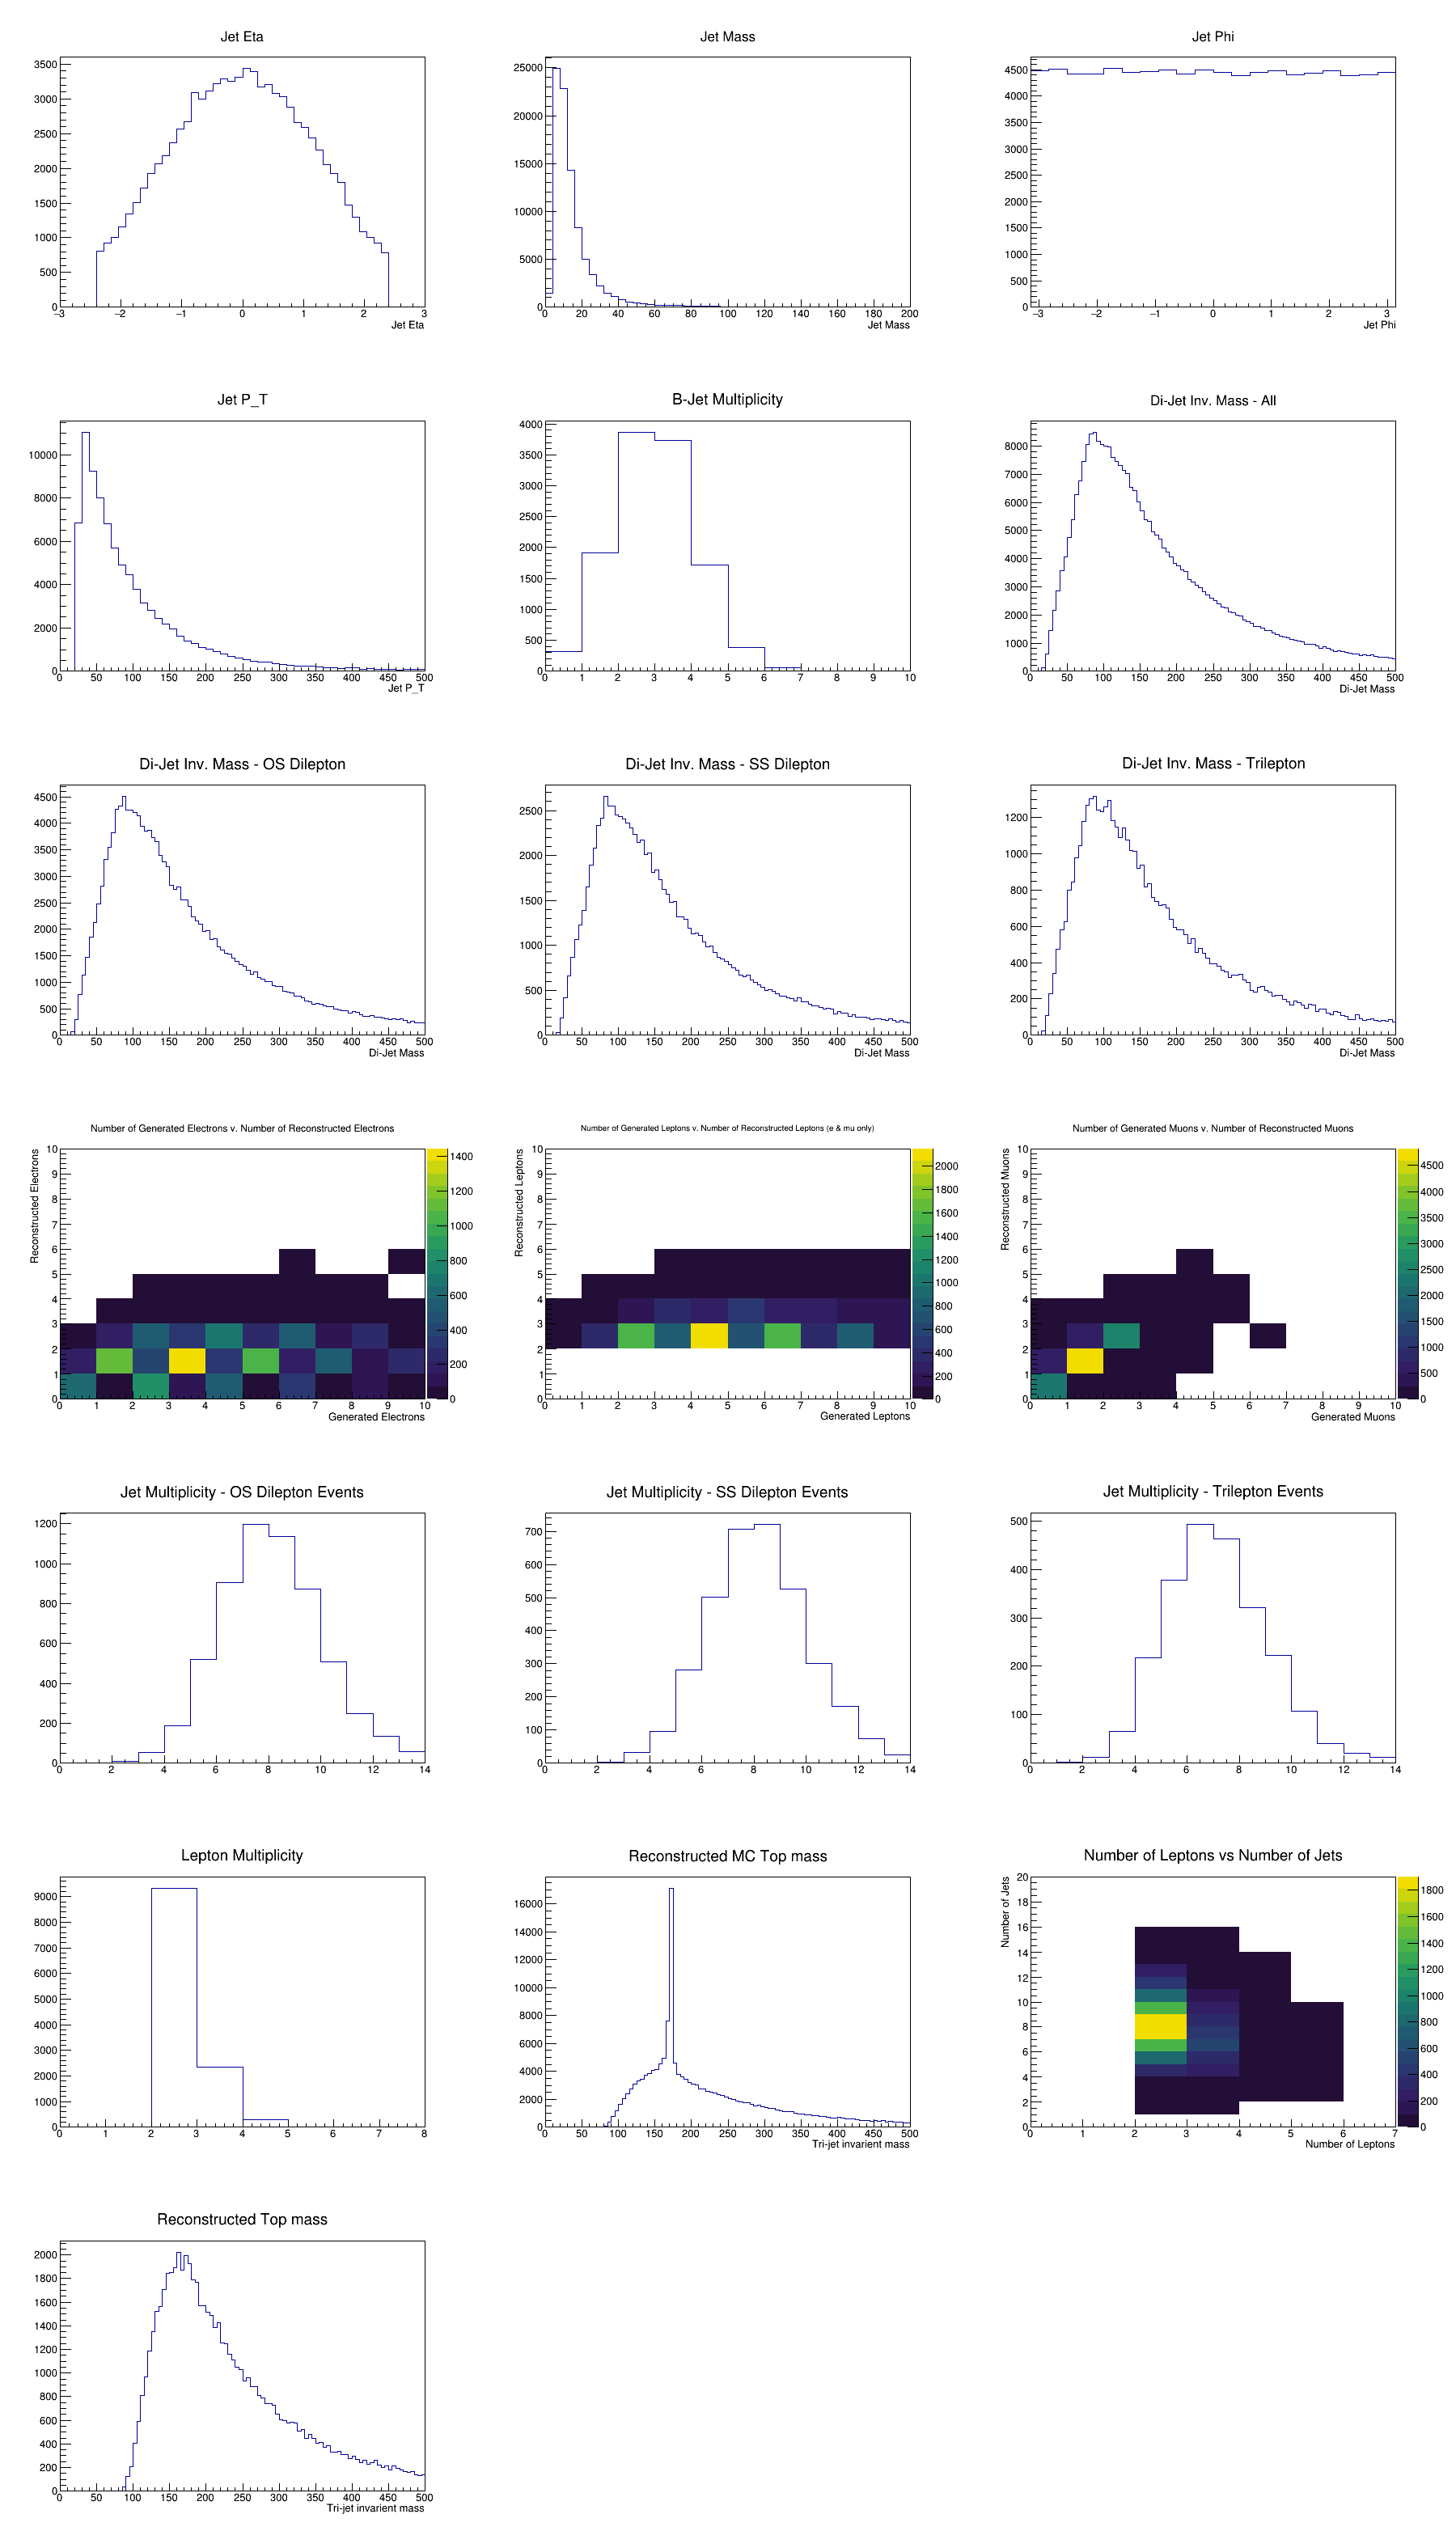

In [15]:
rs_TTTT.draw()

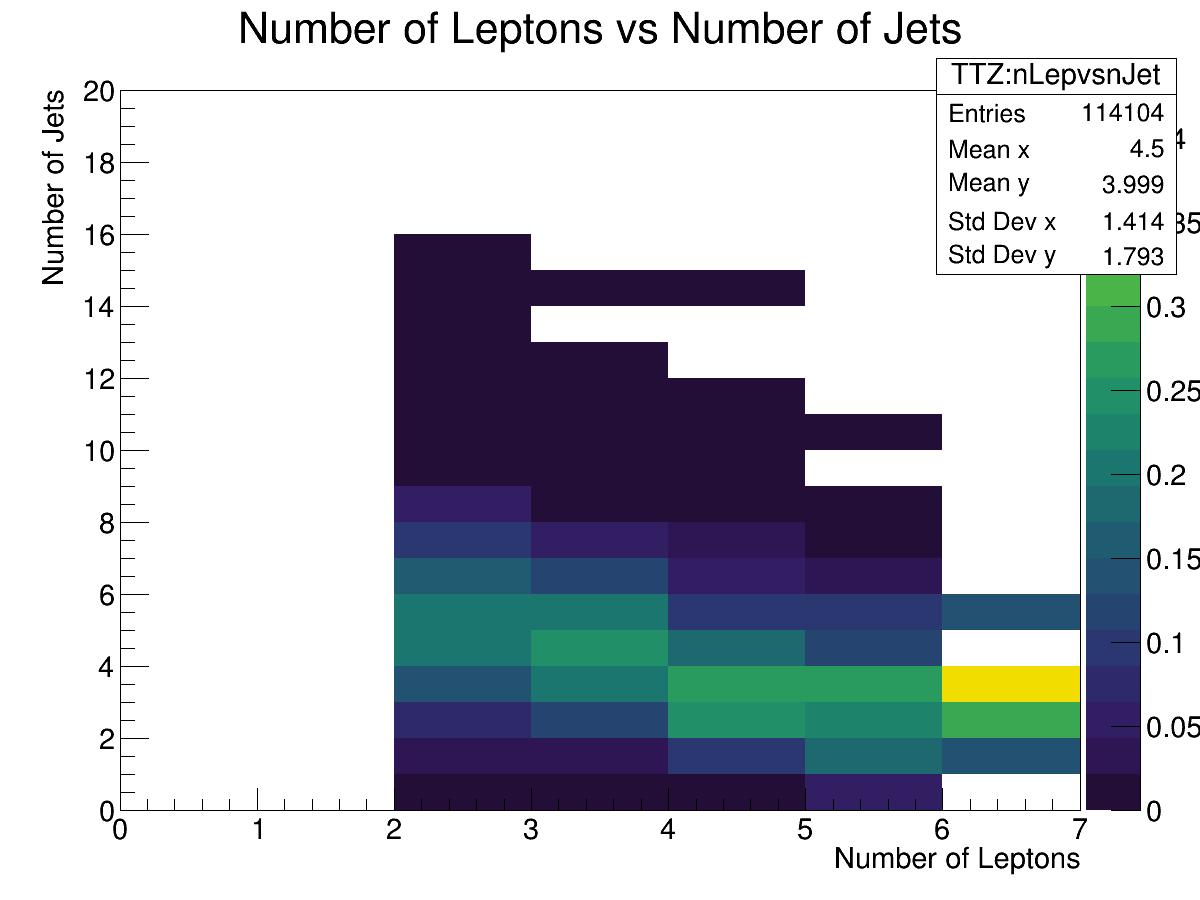

In [16]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.nLepvsnJet)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.nLepvsnJet)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.nLepvsnJet)
clear()
rs_TTZ.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

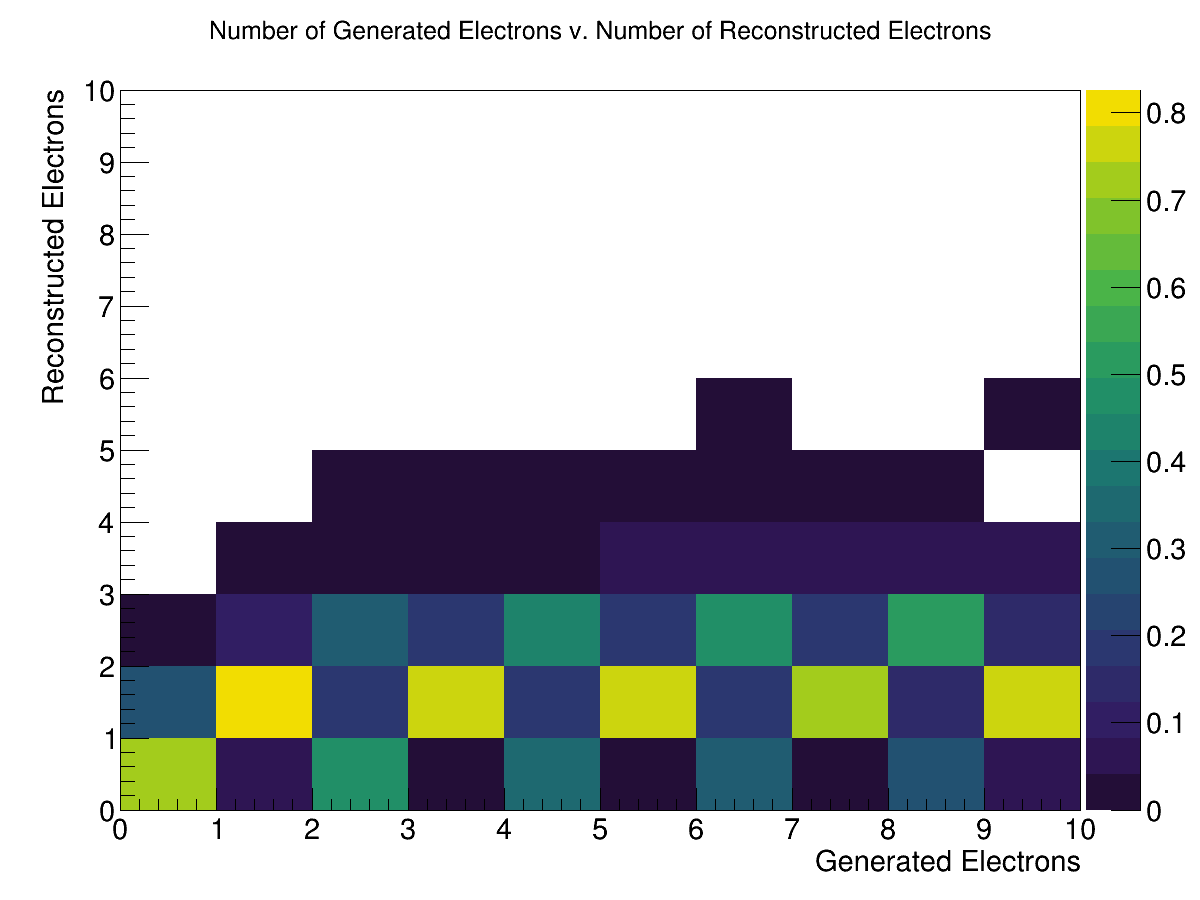

In [17]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.genEle_count_v_recEle_count)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.genEle_count_v_recEle_count)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.genEle_count_v_recEle_count)
clear()
rs_TTTT.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

In [18]:
event_number = int(random.uniform(0,100))
TTZ_event = show_event(rs_TTZ, event_number)
TTW_event = show_event(rs_TTW, event_number)
TTH1_event = show_event(rs_TTH1, event_number)
TTTT_event = show_event(rs_TTTT, event_number)

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Darker is lower, greener/lighter is higher. The following are the particle trees for event #{{event_number}} in each dataset.
  - TTZ Generator-Level Particles
{{TTZ_event}}
-----------------------------------------
  - TTW Generator-Level Particles
{{TTW_event}}
-----------------------------------------
  - TTH Generator-Level Particles
{{TTH1_event}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{TTTT_event}}

<ROOT.THStack object ("lepton_count_stack") at 0x1e5c1240>

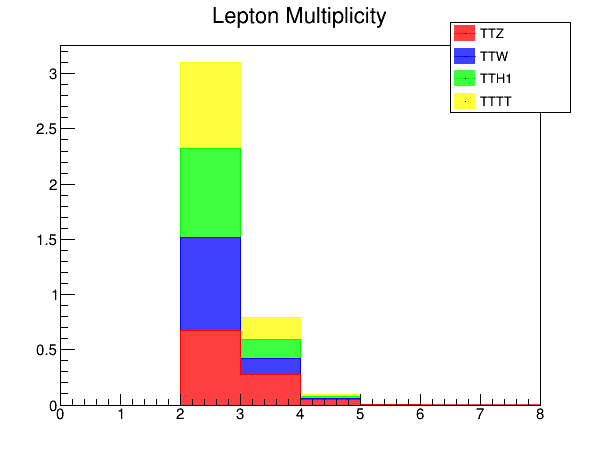

In [19]:
ResultSet.stack_hist("lepton_count", title="Lepton Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x1102ad0>

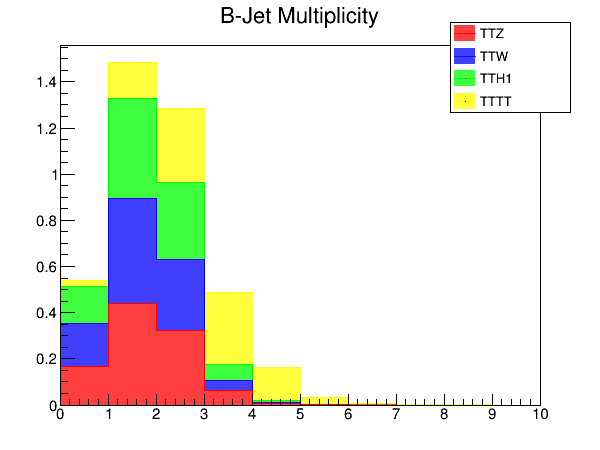

In [20]:
ResultSet.stack_hist("b_jet_count", title="B-Jet Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

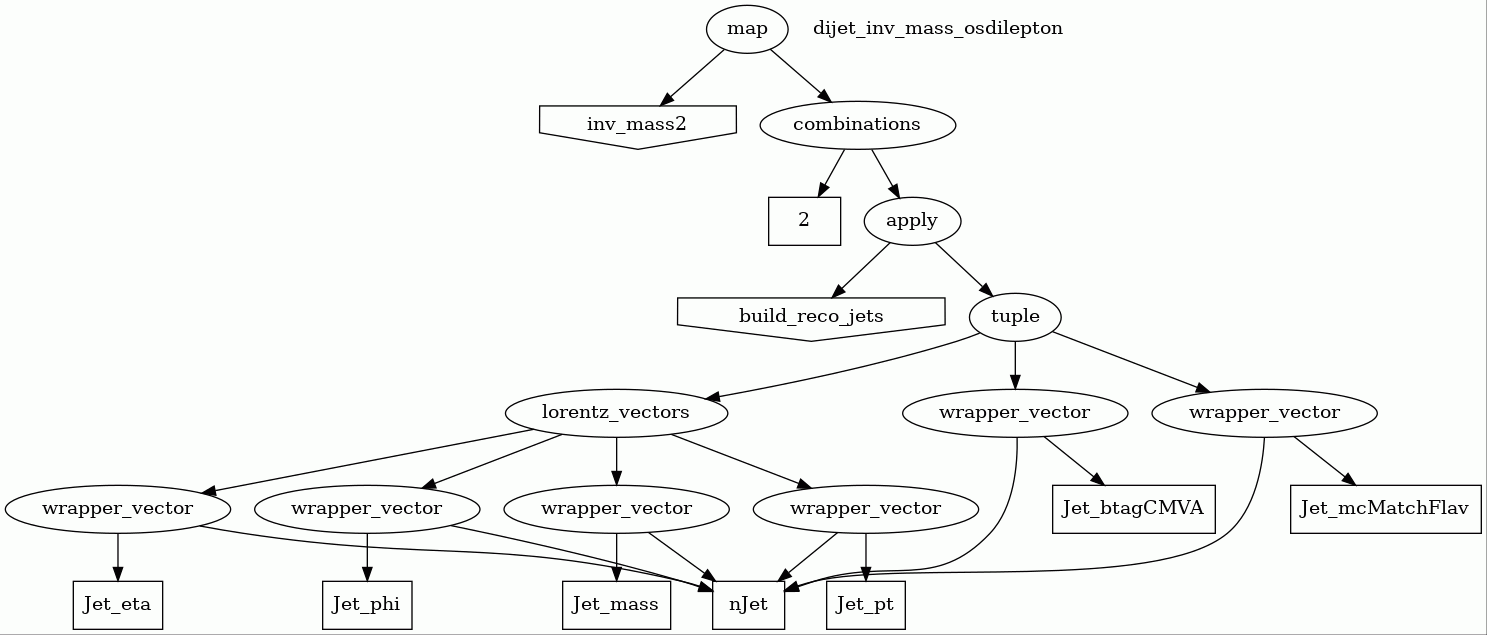

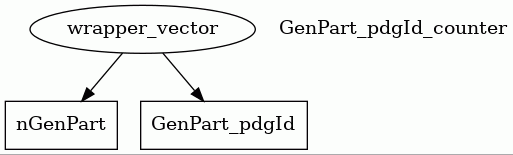

In [21]:
display(show_value(rs_TTTT, rs_TTTT.dijet_inv_mass_osdilepton)[0])
display(show_value(rs_TTTT, "GenPart_pdgId_counter")[0])